### 公式

$P(Y|X_1,X_2,...,X_n)= \frac{P(X_1,X_2,...,X_n | Y)P(Y)}{P(X_1,X_2,...X_n)} $

通常，可以假设各个特征之间相互独立，所以 $P(X_1,X_2,...,X_n|Y)=P(x_1|Y)P(X_2|Y)...P(X_n|Y)P(Y)$

In [2]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [4]:
df = pd.read_excel('./data/肿瘤数据.xlsx')


In [5]:
df.head()

,最大周长,最大凹陷度,平均凹陷度,最大面积,最大半径,平均灰度值,肿瘤性质
0,184.60,0.2654,0.14710,2019.0,25.38,17.33,0
1,158.80,0.1860,0.07017,1956.0,24.99,23.41,0
2,152.50,0.2430,0.12790,1709.0,23.57,25.53,1
3,98.87,0.2575,0.10520,567.7,14.91,26.50,0
4,152.20,0.1625,0.10430,1575.0,22.54,16.67,0


In [6]:
X = df.drop(columns='肿瘤性质')
y = df['肿瘤性质']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = nb_clf.predict(X_test)
y_pred_proba = nb_clf.predict_proba(X_test)

In [16]:
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)

In [17]:
a

,预测值,实际值
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
109,0,0
110,0,0
111,1,1
112,1,1


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

score = roc_auc_score(y_test, y_pred)
print(score)

0.9285714285714286


In [23]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

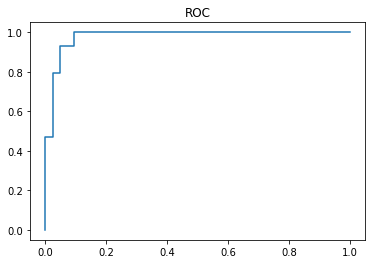

In [27]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.title('ROC')
plt.show()